#Importing the Required Libraries.(**Numpy** and **Matplotlib**(for visualization))

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

##Defining the functions
So, Our Data will be as follows:
> [how much the student slept, how much the student studied]

The data will be a numpy array which we will create on our own because for this project our main focus is not on building the data.

And Our **Y_true** data is the the correct answer of the particular row.


In [ ]:
x_data = np.array([[0.1,0.9],
                [0.3,0.6],
                [0.7,0.3],
                [0.8,0.2],
                [0.6,0.4],
                [0.2,0.8]])
print(f"Our Data is: {x_data}")
print(f"\n Dimension of our data: {x_data.ndim}")
print(f"Shape of our data: {x_data.shape} \n")

y_true = np.array([1,1,0,0,0,1])
print(f"Our True Answers of the data: {y_true}")
print(f"\n Dimension of True answers: {y_true.ndim}")
print(f"Shape of our True Answers: {y_true.shape}")

Our Data is: [[0.1 0.9]
 [0.3 0.6]
 [0.7 0.3]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]]

 Dimension of our data: 2
Shape of our data: (6, 2) 

Our True Answers of the data: [1 1 0 0 0 1]

 Dimension of True answers: 1
Shape of our True Answers: (6,)


###Now we are gonna code the Class named "**Perceptron**".
This class implements a simple **Perceptron**.

- **`__init__`**: Initializes the perceptron with weights (starting as all ones), a bias of zero, and a learning rate (how fast the model learns).
- **`activation`**: A step function that outputs 1 if input is greater than or equal to zero, otherwise 0.
- **`predict`**: Takes input features, calculates a weighted sum plus bias, and then passes it through the activation function to get the prediction (0 or 1).
- **`train`**: Loops over the training data multiple times (epochs). For each example:
  - Predicts the output,
  - Calculates the error (difference between true label and prediction),
  - Updates the weights and bias to reduce the error,
  - Prints the current state so you can watch the learning progress.


In [ ]:
class perceptron:
  def __init__(self,input_size,learning_rate=0.01):
    self.weights = np.ones(input_size)
    self.bias = 0
    self.learning_rate = learning_rate
  def activation(self,z):
    return 1 if z>=0 else 0
  def predict(self,x_data):
    z = np.dot(self.weights,x_data) + self.bias
    return self.activation(z)
  def train(self,x_data,y_true,epochs=10):
    for epoch in range(epochs):
      for x,y in zip(x_data,y_true):
        y_pred = self.predict(x)
        error = y-y_pred
        self.weights += self.learning_rate * error*x
        self.bias += self.learning_rate * error
        print(f"Epoch: {epoch+1}; Weights: {self.weights}; Bias: {self.bias}; True: {y}; Prediction: {y_pred} ")


### Create a **perceptron model** with 2 input features and a learning rate of *0.05*

In [ ]:
p = perceptron(2, learning_rate=0.05)

##**Training The Perceptron**
The x_data has 6 samples with 2 features.
The y_true is the Corresponding true labels of x_data.

Training the perceptron model on the dataset for **20 epochs**

In [ ]:
x_data = np.array([
    [0.1, 0.9],
    [0.3, 0.6],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.6, 0.4],
    [0.2, 0.8]
])
y_true = np.array([1, 1, 0, 0, 0, 1])

p.train(x_data,y_true,epochs=20)

Epoch: 1; Weights: [1. 1.]; Bias: 0.0; True: 1; Prediction: 1 
Epoch: 1; Weights: [1. 1.]; Bias: 0.0; True: 1; Prediction: 1 
Epoch: 1; Weights: [0.965 0.985]; Bias: -0.05; True: 0; Prediction: 1 
Epoch: 1; Weights: [0.925 0.975]; Bias: -0.1; True: 0; Prediction: 1 
Epoch: 1; Weights: [0.895 0.955]; Bias: -0.15000000000000002; True: 0; Prediction: 1 
Epoch: 1; Weights: [0.895 0.955]; Bias: -0.15000000000000002; True: 1; Prediction: 1 
Epoch: 2; Weights: [0.895 0.955]; Bias: -0.15000000000000002; True: 1; Prediction: 1 
Epoch: 2; Weights: [0.895 0.955]; Bias: -0.15000000000000002; True: 1; Prediction: 1 
Epoch: 2; Weights: [0.86 0.94]; Bias: -0.2; True: 0; Prediction: 1 
Epoch: 2; Weights: [0.82 0.93]; Bias: -0.25; True: 0; Prediction: 1 
Epoch: 2; Weights: [0.79 0.91]; Bias: -0.3; True: 0; Prediction: 1 
Epoch: 2; Weights: [0.79 0.91]; Bias: -0.3; True: 1; Prediction: 1 
Epoch: 3; Weights: [0.79 0.91]; Bias: -0.3; True: 1; Prediction: 1 
Epoch: 3; Weights: [0.79 0.91]; Bias: -0.3; True

##As we can see above the model is now trained and predicting correct. Now its time to Predict a random value given by us.

In [ ]:
p.predict(np.array([0.4,0.6]))

1

###we can see that the Perceptron is working as we wanted it to be. Now its time to plot it so we can visualize it.

In [ ]:
def plot_decision_boundary(model, X, y):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
    x_values = np.array([min(X[:,0]) - 0.1, max(X[:,0]) + 0.1])
    y_values = -(model.weights[0] * x_values + model.bias) / model.weights[1]
    plt.plot(x_values, y_values, 'k-')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

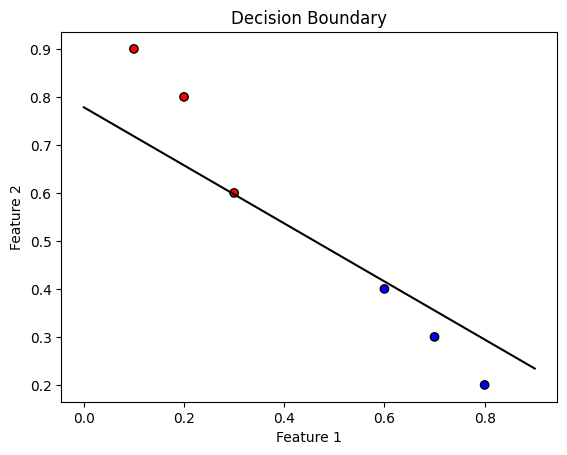

In [ ]:
plot_decision_boundary(p,x_data,y_true)

##Accuracy of the model!

In [ ]:
def accuracy(model, X, y_true):
    y_pred = np.array([model.predict(x) for x in X])
    correct = np.sum(y_pred == y_true)
    return correct / len(y_true)
acc = accuracy(p, x_data, y_true)
print(f"Model Accuracy: {acc*100 }%")


Model Accuracy: 100.0


###It has 100% Accuracy because our data set was very small and simple and with no outliers.